## Select from the ecad.eu website:

daily data--> blend --> germany --> berlin-tempelhof --> mean temperature

download data select --> **TG_STAID002759.txt**

## EDA the mean temperature data

In [ ]:
#!pip install plotly

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import plotly.express as pl
import matplotlib.pyplot as plt

%matplotlib inline

from datetime import datetime

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
ts = pd.read_csv('./ECA_blended_custom/TG_STAID002759.txt', 
sep=',', 
header=14, # the data start in this row 
usecols=[1,2], # we dont need id or the last row
skipfooter=1, # the last value of the rows is not needed 
index_col=0, # put date as index
parse_dates=True) # set to date frame

### Dataframe of mean temperature: 
- set our dt into a datetime dataframe
- change the column name from TG to temperature because there is lots of space in the title and makes it difficult to work with
- multiply that row by 0.1 as indicated in the text file to have a celcius correct
- obtained year, month, week and day into new columns 
- take into account these values: **FILE FORMAT (MISSING VALUE CODE IS -9999)**
- 


In [3]:
# observe imported data
ts

,TG
DATE,
1876-01-01,22
1876-01-02,25
1876-01-03,3
1876-01-04,-58
1876-01-05,-98
...,...
2022-03-26,94
2022-03-27,97
2022-03-28,108


In [4]:
# multiply by 0.1
ts = 0.1*ts

In [5]:
ts.head(3)

,TG
DATE,
1876-01-01,2.2
1876-01-02,2.5
1876-01-03,0.3


In [6]:
# check if there are null values
ts.isna().sum()

   TG    0
dtype: int64

In [7]:
ts['month'] = ts.index.month
ts['year'] = ts.index.year

In [8]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53415 entries, 1876-01-01 to 2022-03-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0      TG   53415 non-null  float64
 1   month   53415 non-null  int64  
 2   year    53415 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.6 MB


In [9]:
ts.isna().sum()

   TG    0
month    0
year     0
dtype: int64

In [10]:
# check my 
ts.describe()

,TG,month,year
count,53415.000000,53415.000000,53415.000000
mean,5.704948,6.515417,1948.623027
std,61.376648,3.450974,42.217678
min,-999.900000,1.000000,1876.000000
25%,3.300000,4.000000,1912.000000
50%,9.300000,7.000000,1949.000000
75%,15.700000,10.000000,1985.000000
max,30.500000,12.000000,2022.000000


In [11]:
# see that the TG column has so many spaces before --> change to temperature
ts.columns

Index(['   TG', 'month', 'year'], dtype='object')

In [12]:
ts.rename(columns={'   TG':'temperature_C'}, inplace=True)

In [13]:
ts.tail()

,temperature_C,month,year
DATE,,,
2022-03-26,9.4,3,2022
2022-03-27,9.7,3,2022
2022-03-28,10.8,3,2022
2022-03-29,8.0,3,2022
2022-03-30,5.3,3,2022


<AxesSubplot:xlabel='    DATE'>

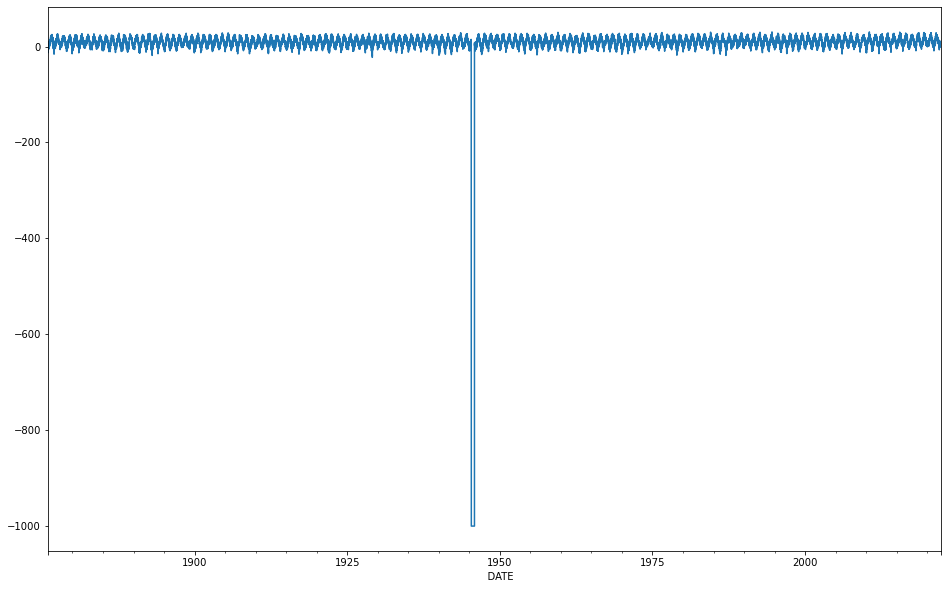

In [14]:
plt.figure(figsize=(16, 10))
ts['temperature_C'].plot()

### the -9999 values here were converted to NAN values then filledin with backfill

- not needed for this case since the back fill will be filled in with 0
- but need to use copy of the average of the previous year with the next year

In [15]:
# # in .describe you can observe that the min value has all these decimal '0' values which need to be included in here...
# ts['temperature_C'].loc[ts['temperature_C'] < -999.900000]

# ### in order to set these values into nan values import NUMPY!!!!!!!!!!!!

# ## another ex: dataClean['temp'].replace(-9999, pd.NA , inplace=True)

# ts['temperature_C'].loc[ts['temperature_C'] < -999.900000] = np.nan

# ts.isna().sum()

# ts.fillna(method='backfill', inplace=True)

### making the average of the previous year with the following year and filling in to those -999.90000 values

In [16]:
ts['temperature_C'].loc[ts['temperature_C'] < -999.900000]

    DATE
1945-04-25   -999.9
1945-04-26   -999.9
1945-04-27   -999.9
1945-04-28   -999.9
1945-04-29   -999.9
              ...  
1945-11-01   -999.9
1945-11-02   -999.9
1945-11-03   -999.9
1945-11-04   -999.9
1945-11-05   -999.9
Name: temperature_C, Length: 195, dtype: float64

In [17]:
# shift function grabs the temp column in the new column created copies and moved down 365 days down
ts['shift'] = ts['temperature_C'].shift(365)

In [18]:
# here we apply the same shift but multiply 365 by 2 because we want to grab and copy those values 2 years ahead  
ts['shift2'] = ts['temperature_C'].shift(365*2)

In [21]:
ts # check the shift values

,temperature_C,month,year,shift,shift2
DATE,,,,,
1876-01-01,2.2,1,1876,NaN,NaN
1876-01-02,2.5,1,1876,NaN,NaN
1876-01-03,0.3,1,1876,NaN,NaN
1876-01-04,-5.8,1,1876,NaN,NaN
1876-01-05,-9.8,1,1876,NaN,NaN
...,...,...,...,...,...
2022-03-26,9.4,3,2022,10.8,5.6
2022-03-27,9.7,3,2022,6.9,9.2
2022-03-28,10.8,3,2022,7.7,7.9


In [22]:
ts.loc['1945-04-25':'1945-11-05'] # checking those values we want to change

,temperature_C,month,year,shift,shift2
DATE,,,,,
1945-04-25,-999.9,4,1945,9.2,12.1
1945-04-26,-999.9,4,1945,9.2,8.8
1945-04-27,-999.9,4,1945,8.8,8.8
1945-04-28,-999.9,4,1945,8.6,7.9
1945-04-29,-999.9,4,1945,6.8,8.4
...,...,...,...,...,...
1945-11-01,-999.9,11,1945,6.0,6.2
1945-11-02,-999.9,11,1945,5.4,8.1
1945-11-03,-999.9,11,1945,5.5,3.0


In [24]:
ts['temperature_C'].loc['1945-04-25':'1945-11-05'] = ts[['shift', 'shift2']].mean(axis=1)
ts['temperature_C'].loc['1945-04-25':'1945-11-05']

    DATE
1945-04-25    10.65
1945-04-26     9.00
1945-04-27     8.80
1945-04-28     8.25
1945-04-29     7.60
              ...  
1945-11-01     6.10
1945-11-02     6.75
1945-11-03     4.25
1945-11-04     3.70
1945-11-05     5.45
Name: temperature_C, Length: 195, dtype: float64

In [25]:
ts.loc['1945-04-25':'1945-11-05']

,temperature_C,month,year,shift,shift2
DATE,,,,,
1945-04-25,10.65,4,1945,9.2,12.1
1945-04-26,9.00,4,1945,9.2,8.8
1945-04-27,8.80,4,1945,8.8,8.8
1945-04-28,8.25,4,1945,8.6,7.9
1945-04-29,7.60,4,1945,6.8,8.4
...,...,...,...,...,...
1945-11-01,6.10,11,1945,6.0,6.2
1945-11-02,6.75,11,1945,5.4,8.1
1945-11-03,4.25,11,1945,5.5,3.0


In [26]:
ts.drop(columns= ['shift', 'shift2'], inplace=True)

In [28]:
#ts['temperature_C'].to_csv('temp_clean.csv')

## Trend plotting

<AxesSubplot:xlabel='    DATE'>

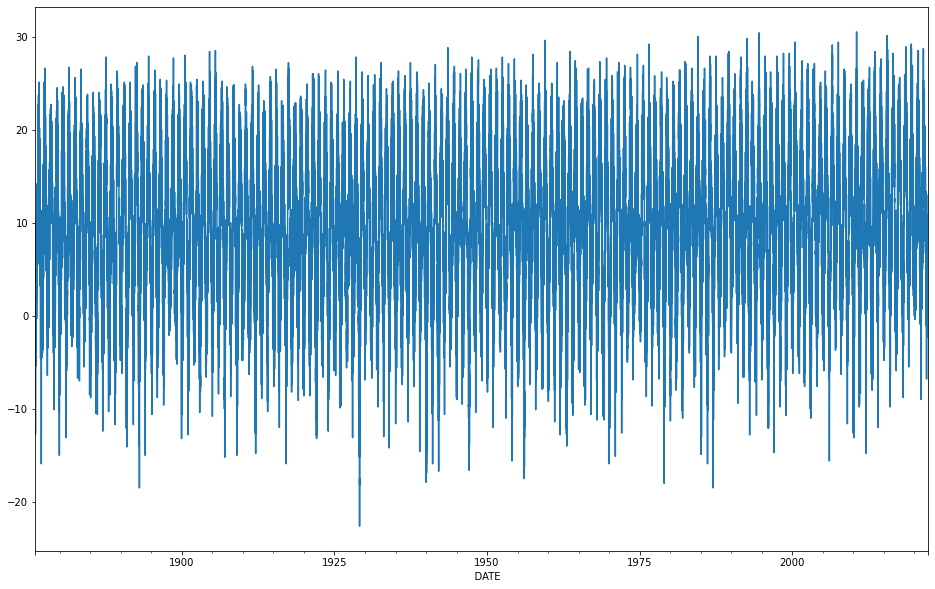

In [29]:
plt.figure(figsize=(16, 10))
ts['temperature_C'].plot()

In [30]:
# year_month_gb = ts.groupby(['year', 'month'])[['temperature_C']].mean()
# year_month_gb

In [31]:
#year_gb.unstack(1).plot()

In [32]:
ts['timestep'] = list(range(len(ts)))
ts

,temperature_C,month,year,timestep
DATE,,,,
1876-01-01,2.2,1,1876,0
1876-01-02,2.5,1,1876,1
1876-01-03,0.3,1,1876,2
1876-01-04,-5.8,1,1876,3
1876-01-05,-9.8,1,1876,4
...,...,...,...,...
2022-03-26,9.4,3,2022,53410
2022-03-27,9.7,3,2022,53411
2022-03-28,10.8,3,2022,53412


In [33]:
# Run a Linear Regression
m = LinearRegression()
X = ts[['timestep']]
y = ts['temperature_C']
m.fit(X, y)

LinearRegression()

In [34]:
# Use the model to make a prediction
# the predictions on x (in this case timestamp) is modeling the trend of passengers in the data
ts['trend'] = m.predict(X)
ts

,temperature_C,month,year,timestep,trend
DATE,,,,,
1876-01-01,2.2,1,1876,0,8.541717
1876-01-02,2.5,1,1876,1,8.541750
1876-01-03,0.3,1,1876,2,8.541782
1876-01-04,-5.8,1,1876,3,8.541815
1876-01-05,-9.8,1,1876,4,8.541847
...,...,...,...,...,...
2022-03-26,9.4,3,2022,53410,10.278199
2022-03-27,9.7,3,2022,53411,10.278232
2022-03-28,10.8,3,2022,53412,10.278264


<AxesSubplot:xlabel='    DATE'>

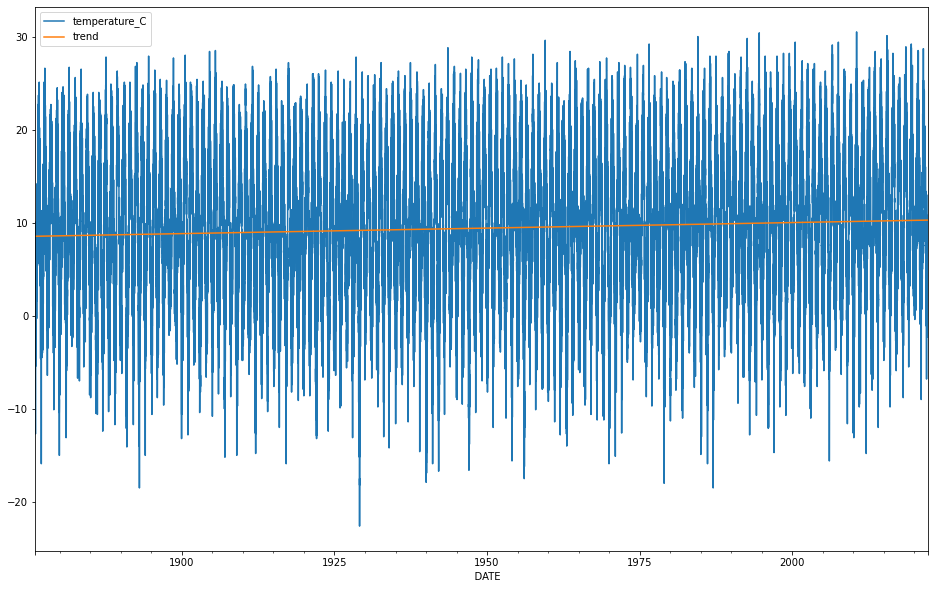

In [35]:
ts[['temperature_C', 'trend']].plot(figsize=(16, 10))

## Seasonality

In [36]:
# we can use OneHotEncoder or dummies to see all those months in columns...
pd.get_dummies(ts.index.month, prefix='month').set_index(ts.index)

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,
1876-01-01,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-02,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-03,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-04,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-05,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-26,0,0,1,0,0,0,0,0,0,0,0,0
2022-03-27,0,0,1,0,0,0,0,0,0,0,0,0
2022-03-28,0,0,1,0,0,0,0,0,0,0,0,0


In [37]:
# One-Hot-Encoding the month
#### dropped first month since it is redundant information 
seasonal_dummies = pd.get_dummies(ts.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(ts.index)
# sklearn.preprocessing.OneHotEncoder

ts = ts.join(seasonal_dummies)

In [38]:
ts

,temperature_C,month,year,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,,,,,
1876-01-01,2.2,1,1876,0,8.541717,0,0,0,0,0,0,0,0,0,0,0
1876-01-02,2.5,1,1876,1,8.541750,0,0,0,0,0,0,0,0,0,0,0
1876-01-03,0.3,1,1876,2,8.541782,0,0,0,0,0,0,0,0,0,0,0
1876-01-04,-5.8,1,1876,3,8.541815,0,0,0,0,0,0,0,0,0,0,0
1876-01-05,-9.8,1,1876,4,8.541847,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-26,9.4,3,2022,53410,10.278199,0,1,0,0,0,0,0,0,0,0,0
2022-03-27,9.7,3,2022,53411,10.278232,0,1,0,0,0,0,0,0,0,0,0
2022-03-28,10.8,3,2022,53412,10.278264,0,1,0,0,0,0,0,0,0,0,0


In [39]:
# Define X and y
### for the seasonality is just taking into account timestamp and individual months and dropping those shown in the code...
X = ts.drop(columns=['temperature_C', 'year', 'month', 'trend'])

In [40]:
### this y is from the previous y which is just the passenger from the 'flight' dataframe
m.fit(X, y)

LinearRegression()

In [41]:
# Create a model with trend and seasonality
ts['trend_seasonal'] = m.predict(X)
ts.head()

,temperature_C,month,year,timestep,trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal
DATE,,,,,,,,,,,,,,,,,
1876-01-01,2.2,1,1876,0,8.541717,0,0,0,0,0,0,0,0,0,0,0,-0.868719
1876-01-02,2.5,1,1876,1,8.541750,0,0,0,0,0,0,0,0,0,0,0,-0.868686
1876-01-03,0.3,1,1876,2,8.541782,0,0,0,0,0,0,0,0,0,0,0,-0.868652
1876-01-04,-5.8,1,1876,3,8.541815,0,0,0,0,0,0,0,0,0,0,0,-0.868619
1876-01-05,-9.8,1,1876,4,8.541847,0,0,0,0,0,0,0,0,0,0,0,-0.868586


## Original and trend


<AxesSubplot:xlabel='    DATE'>

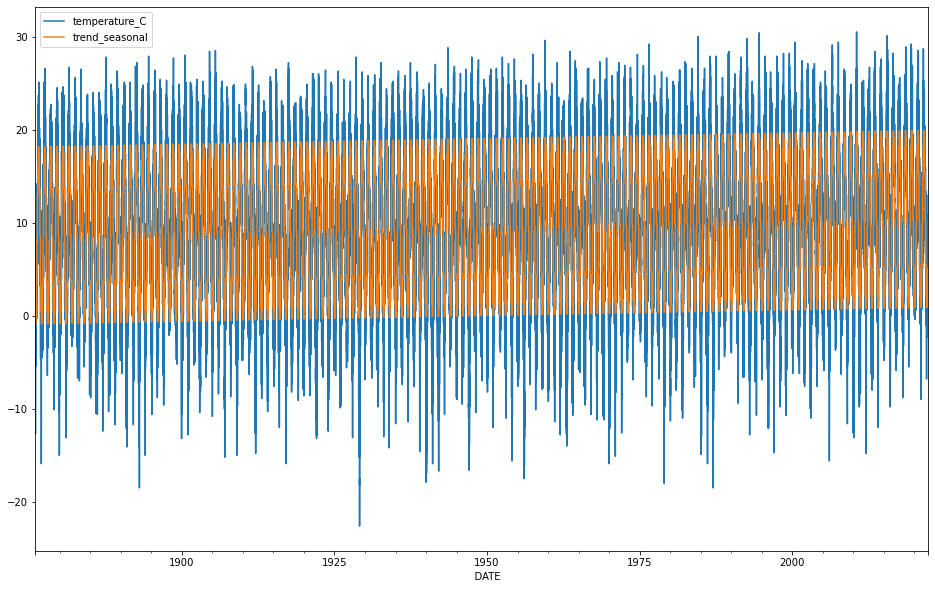

In [42]:
ts[['temperature_C', 'trend_seasonal']].plot(figsize=(16, 10))

## remainder (residuals)

In [43]:
# We want to extract the part of the model that the trend_seasonal is not able to explain
ts['remainder'] = ts['temperature_C'] - ts['trend_seasonal']

In [44]:
#plotly
pl.line(ts['remainder'])

In [45]:
ts['remainder'].to_csv('temp_remainder.csv')